# UV-Guider alignement with source in autocoll
##  Field 4

In [2]:
%matplotlib inline

from __future__ import division, print_function

import sys
sys.path.insert(1, '../../Calibration')
sys.path.append( '../../FireBallPipe')
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table
import matplotlib.patches as patches

from guider2UV.guider2UV import Guider2UV, diff_skycoord

from Calibration.mapping import Mapping

In [3]:
cloudpath = '/home/dvibert/ownCloud/FIREBALL/'
cloudpath = '/Users/Vincent/Nextcloud/LAM/FIREBALL/'


## initialization from last xy calib

In [4]:
G2UV = Guider2UV(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F4_180826.pkl')
print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39242605, 36.41307253)>): (lon, lat) in deg
    [(0.18305925, 0.00754495)]>
FOV center pixel position in guider [array([1366.30280082]), array([561.43593333])]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-90.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (36.9049, 0.65245)>)>
    gamma: 1.0

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39242605, 36.41307253)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.39242605  36.4130725262  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024526131524219  0.00024414585789761  
NAXIS : 0  0

    mask_rotation: 32.2732684991399

In [5]:
target_filename = '/Users/Vincent/Github/FireBallPipe/Calibration/Targets/targets_F4.txt'
F4 = Table.read(target_filename, format='ascii')

## Diffuse UV image

load new mapping

In [6]:
mask_det_map_file = cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/Detector_Mask_mappings/mapping-mask-det-180823-F4.pkl'
mask_det_map = Mapping(mask_det_map_file)
G2UV.set_detector_mapping(mask_det_map, offsets = [12.73 + 1., 1.57 + 1.])


## Scan sequence

GC - 31 - 40 - 44 - 33 - 12 - 6 - 8 - 13

In [7]:
slits = ['31', '40', '44', '33', '12', '6', '8', '13'] 
# ici on balaye tout le champs
 
movs, slits_coord = G2UV.compute_autocoll_moves_slits(slits, F4, hystcomp = True)
#donner les siderostat moves à Johan

slit position in mm on mask: [ 4.853195 -3.812219]
slit position in mm on mask: [ 8.811543 -3.028793]
slit position in mm on mask: [10.563193  2.136243]
slit position in mm on mask: [5.386155 4.42581 ]
slit position in mm on mask: [-5.638908  2.803272]
slit position in mm on mask: [-8.51572   4.436704]
slit position in mm on mask: [-7.570966  1.9379  ]
slit position in mm on mask: [-5.303522 -0.138687]

targets local coords in siderostat local frame:
EL: 168.3 arcsec ; CE: 189.2 arcsec
EL: 203.1 arcsec ; CE: 353.1 arcsec
EL: 423.3 arcsec ; CE: 423.8 arcsec
EL: 518.3 arcsec ; CE: 208.1 arcsec
EL: 445.0 arcsec ; CE: -247.8 arcsec
EL: 513.4 arcsec ; CE: -367.8 arcsec
EL: 407.5 arcsec ; CE: -327.5 arcsec
EL: 320.3 arcsec ; CE: -232.7 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 168.3 arcsec ; CE 189.2 arcsec ; image: True
EL: 34.7 arcsec ; CE 163.9 arcsec ; image: True
EL: 220.2 arcsec ; CE 70.8 arcse

In [8]:
movs.sum(axis=0)*3600

array([ 4.09272616e-10, -2.04636308e-10])

observed slits position :

In [9]:
slits_coord_obs_det = np.array([
       [1949.3159009 ,  585.48326732],
       [1889.08021255,  280.63274907],
       [1537.11743484,  151.33582687],
       [1393.47052805,  548.72769955],
       [1515.17137437, 1391.33183014],
       [1404.33980027, 1617.006362  ],
       [1573.20961616, 1543.30619621],
       [1713.61565248, 1366.89630183],
#return
       [1714.02190371, 1362.65367161],
       [1573.37446663, 1540.16005209],
       [1404.15691381, 1619.53755111],
       [1515.35044943, 1395.87784645],
       [1393.86272984,  553.35903851],
       [1536.87479529,  146.76319868],
       [1888.62954955,  276.27304535],
       [1949.00447949,  579.76363422]])


slits_coord_obs_det

array([[1949.3159009 ,  585.48326732],
       [1889.08021255,  280.63274907],
       [1537.11743484,  151.33582687],
       [1393.47052805,  548.72769955],
       [1515.17137437, 1391.33183014],
       [1404.33980027, 1617.006362  ],
       [1573.20961616, 1543.30619621],
       [1713.61565248, 1366.89630183],
       [1714.02190371, 1362.65367161],
       [1573.37446663, 1540.16005209],
       [1404.15691381, 1619.53755111],
       [1515.35044943, 1395.87784645],
       [1393.86272984,  553.35903851],
       [1536.87479529,  146.76319868],
       [1888.62954955,  276.27304535],
       [1949.00447949,  579.76363422]])

In [10]:
slits_coord_obs_det.shape

(16, 2)

In [11]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
obs_wave = G2UV.mask_det_map.w[0]
print("wave: ", obs_wave)

slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.20255


In [12]:
slits_coord_valid

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39242605, 36.41307253)>): (lon, lat) in deg
     [(0.09388028, -0.10820609)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39242605, 36.41307253)>): (lon, lat) in deg
     [(0.11325723, -0.20190289)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39242605, 36.41307253)>): (lon, lat) in deg
     [(0.23604675, -0.24236654)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39242605, 36.41307253)>): (lon, lat) in deg
     [(0.28905817, -0.11901337)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39242605, 36.41307253)>): (lon, lat) in deg
     [(0.2481774, 0.14167736)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39242605, 36.41307253)>):

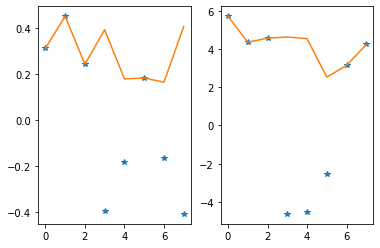

In [15]:
# analyser histeresis
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
fig, (ax0,ax1) = plt.subplots(1,2)
# ax0.subplot('120')
ax0.plot(pair_diff[:,0],'*')
ax0.plot(np.abs(pair_diff[:,0]),'-')
# plt.title("El pair diff")
# plt.ylabel("El arcsec")
# plt.subplot('121')
ax1.plot(pair_diff[:,1],'*')
ax1.plot(np.abs(pair_diff[:,1]),'-')
# plt.title("Ce pair diff")
# plt.ylabel("Ce arcsec")


In [16]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )


Fitting rotation, translation and magnification
gamma: 1.001987005843998
theta: 17.519586882347976 arcmin
dx: -5.615138174416995 arcsec
dy: 5.366774959064225 arcsec
variances: [3.70672132e-04 1.27427693e+00 3.74614573e-01 3.74614573e-01]

residuals in arcsec: [[-1.68433349  5.38995582]
 [-0.46739108  2.69934178]
 [ 1.21014636  1.60621335]
 [ 1.27522648 -2.07277262]
 [-0.04355511 -4.44682226]
 [-0.03725072 -0.51453834]
 [ 0.80603199  1.39747473]
 [-0.93078052  1.67528592]
 [-1.45460975 -3.02896277]
 [ 0.60676392 -2.11585494]
 [ 0.16884216  2.29084544]
 [-0.2699715   0.61384827]
 [ 0.8988432   3.08242029]
 [ 1.35647709 -3.45794099]
 [-0.02609162 -2.16989579]
 [-1.4083474  -0.94859791]]
max residual in EL,CE 1.7, 5.4 arcsec
mean residual in EL,CE 1.0, 2.7 arcsec


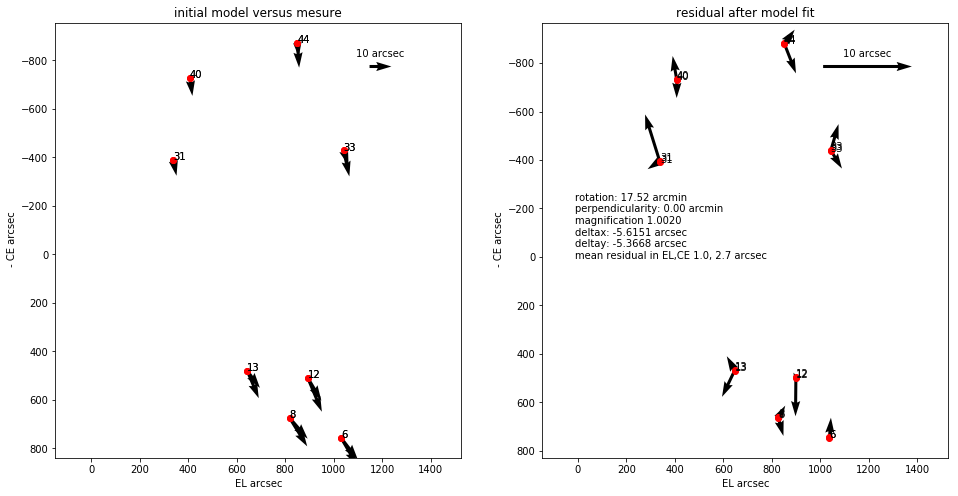

In [21]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)

In [25]:
#G2UVcor.save(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F4_180904.pkl')

Dumping to /home/dvibert/ownCloud/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F4_180904.pkl


In [22]:
movs_new, slits_coord_new = G2UVcor.compute_autocoll_moves_slits(slits, F4, hystcomp = True)

slit position in mm on mask: [ 4.853195 -3.812219]
slit position in mm on mask: [ 8.811543 -3.028793]
slit position in mm on mask: [10.563193  2.136243]
slit position in mm on mask: [5.386155 4.42581 ]
slit position in mm on mask: [-5.638908  2.803272]
slit position in mm on mask: [-8.51572   4.436704]
slit position in mm on mask: [-7.570966  1.9379  ]
slit position in mm on mask: [-5.303522 -0.138687]

targets local coords in siderostat local frame:
EL: 166.9 arcsec ; CE: 186.2 arcsec
EL: 202.5 arcsec ; CE: 350.2 arcsec
EL: 423.5 arcsec ; CE: 420.0 arcsec
EL: 517.7 arcsec ; CE: 203.4 arcsec
EL: 441.8 arcsec ; CE: -253.1 arcsec
EL: 509.7 arcsec ; CE: -373.7 arcsec
EL: 403.8 arcsec ; CE: -332.8 arcsec
EL: 316.9 arcsec ; CE: -237.4 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 166.9 arcsec ; CE 186.2 arcsec ; image: True
EL: 35.7 arcsec ; CE 164.0 arcsec ; image: True
EL: 221.0 arcsec ; CE 69.8 arcse

## Star sequence

gc - s18 - s29 - s34 - s14 

In [24]:
star_target_path = cloudpath + 'Target_selection/GuidingStars/'

F4_stars = Table.read(star_target_path + "F4_guidingstars.fits", format='fits')

stars = [29, 34, 18, 14]

star_movs, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F4_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(36.987137, 0.402799)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(37.023638, 0.390844)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(36.877561, 0.53311)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(36.867454, 0.492628)]>

targets local coords in siderostat local frame:
EL: -119.5 arcsec ; CE: 132.7 arcsec
EL: -140.0 arcsec ; CE: 196.8 arcsec
EL: 111.3 arcsec ; CE: -62.2 arcsec
EL: 38.5 arcsec ; CE: -78.9 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -119.5 arcsec ; CE 132.7 arcsec ; image: True
EL: -20.5 arcsec ; CE 64.1 arcsec ; image: True
EL: 251.3 arcsec ; CE -259.1 arcsec ; image: True
EL: -72.9 arcsec ; CE -16.6 arcsec ; image: True
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 72.9 arcsec ; CE 16.6 arcsec ; image: T

In [ ]:
stars_coord

------------------------------------------------------